In [3]:
import pandas as pd

In [13]:
customer_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [15]:
# 1. Basic Info and Missing Values
def print_basic_info(df, name):
    print(f"Dataset: {name}")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("-" * 50)

print_basic_info(customer_df, "Customers")
print_basic_info(products_df, "Products")
print_basic_info(transactions_df, "Transactions")

Dataset: Customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
--------------------------------------------------
Dataset: Products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
N

In [17]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print("Customers Dataset:\n", customer_df.describe(include='all'))
print("\nProducts Dataset:\n", products_df.describe(include='all'))
print("\nTransactions Dataset:\n", transactions_df.describe(include='all'))


Summary Statistics:
Customers Dataset:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          N

In [19]:
# 3. Unique Values and Distributions
print("\nUnique Counts:")
print("Customers:\n", customer_df.nunique())
print("\nProducts:\n", products_df.nunique())
print("\nTransactions:\n", transactions_df.nunique())


Unique Counts:
Customers:
 CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

Products:
 ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

Transactions:
 TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64


In [21]:
# 4. Key Metrics
# Customer Signup Trends
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])
signup_trends = customer_df['SignupDate'].dt.year.value_counts()

# Top Products by Sales
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

# Revenue by Product
transactions_df['TotalValue'] = transactions_df['Price'] * transactions_df['Quantity']
revenue_by_product = transactions_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)

# Transactions Over Time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_over_time = transactions_df['TransactionDate'].dt.date.value_counts().sort_index()

# Revenue by Region
revenue_by_region = transactions_df.merge(customer_df, on='CustomerID') \
    .groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Insights Summary
print("\nSignup Trends by Year:\n", signup_trends)
print("\nTop Products by Sales:\n", top_products.head(10))
print("\nRevenue by Product:\n", revenue_by_product.head(10))
print("\nTransactions Over Time:\n", transactions_over_time)
print("\nRevenue by Region:\n", revenue_by_region)


Signup Trends by Year:
 SignupDate
2024    79
2022    64
2023    57
Name: count, dtype: int64

Top Products by Sales:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64

Revenue by Product:
 ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64

Transactions Over Time:
 TransactionDate
2023-12-30    1
2023-12-31    3
2024-01-01    4
2024-01-02    4
2024-01-03    4
             ..
2024-12-24    3
2024-12-25    4
2024-12-26    6
2024-12-27    2
2024-12-28    1
Name: count, Length: 337, dtype: int64

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


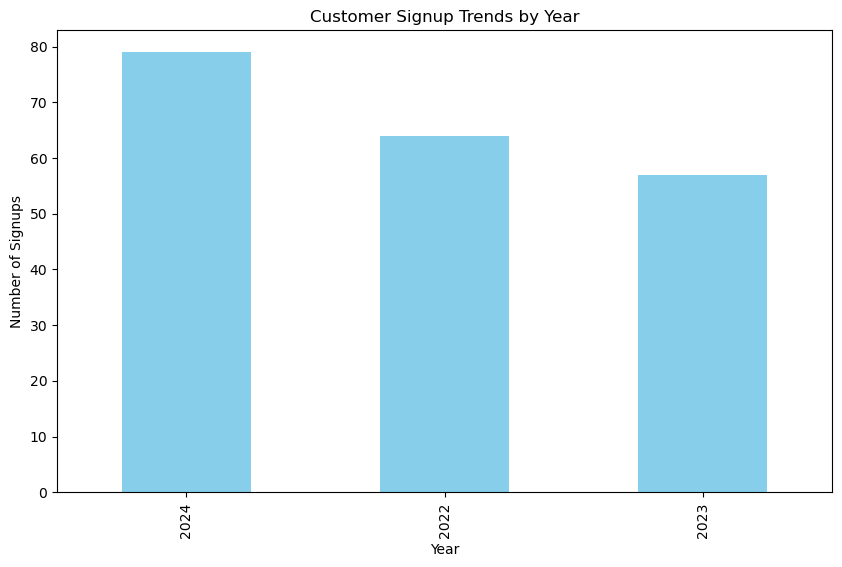

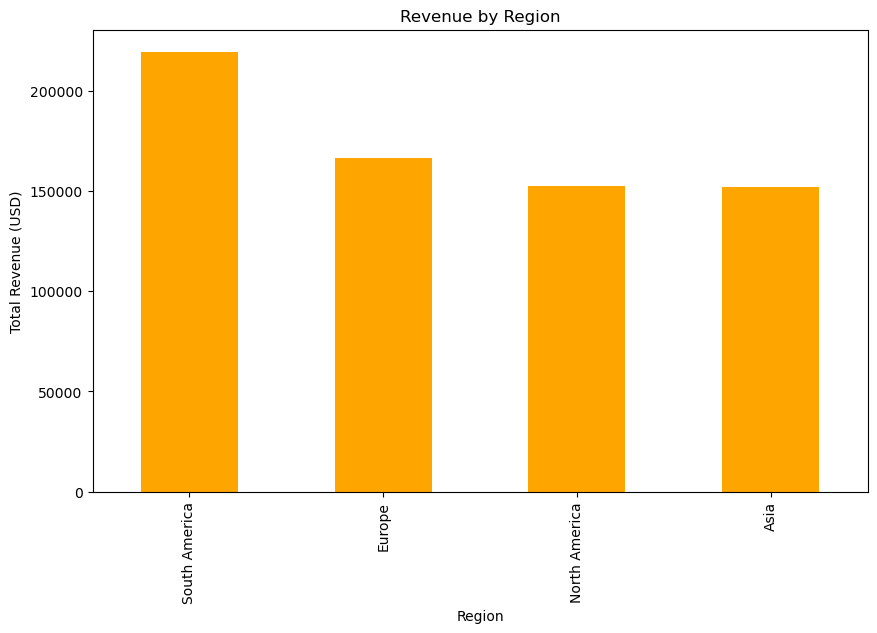

In [23]:
# 5. Visualization (Optional for deeper insights)
import matplotlib.pyplot as plt

# Plotting Signup Trends
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

# Plotting Revenue by Region
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='orange')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()